# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

### Setup Steps

In [1]:
#@title Please enter your registration id to start:  { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [17]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U3W15_Demo_Keras_MNIST" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/elephant.jpg")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:",submission_id)
        print("Date of submission: ",r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


In [6]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

In [7]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
#train_x = train_x.astype('float32') / 255
#test_x = test_x.astype('float32') / 255

train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_x,train_y,batch_size=32,epochs=10,verbose=1)
model.save("mnistmodel.h5")
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5030 - accuracy: 0.7754
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9175
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1959 - accuracy: 0.9417
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1577 - accuracy: 0.9507
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1325 - accuracy: 0.9590
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1214 - accuracy: 0.9617
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1021 - accuracy: 0.9688
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0894 - accuracy: 0.9724
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0785 - accuracy: 0.9754
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.1737 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Class:  6


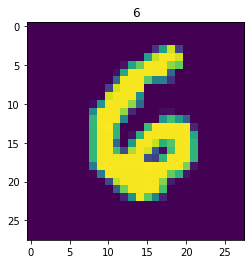

In [9]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.load_weights("mnistmodel.h5")
img = test_x[130]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
model = ResNet50(weights='imagenet')
img_path = 'camel.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02437312', 'Arabian_camel', 0.9999974), ('n02437616', 'llama', 2.554447e-06), ('n02415577', 'bighorn', 1.32135405e-08)]


## Please answer the questions below to complete the experiment:

In [12]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [13]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nn" #@param {type:"string"}


In [14]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [15]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [18]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 12447
Date of submission:  26 Dec 2020
Time of submission:  05:22:01
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
